### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('coupons.csv')

In [6]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [18]:
# Check for total amount of null values across columns
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [42]:
# Replace all null values with 0, assume if null those values are equal to 0
data1 = data.fillna(0)

4. What proportion of the total observations chose to accept the coupon?



In [48]:
# Calculate decimal value of who accepted coupon utilizing Y attribute and dividing by shape of dataframe
data1['Y'].sum()/data1.shape[0]

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

In [68]:
data_bar = data1.groupby('coupon')[['Y']].sum()

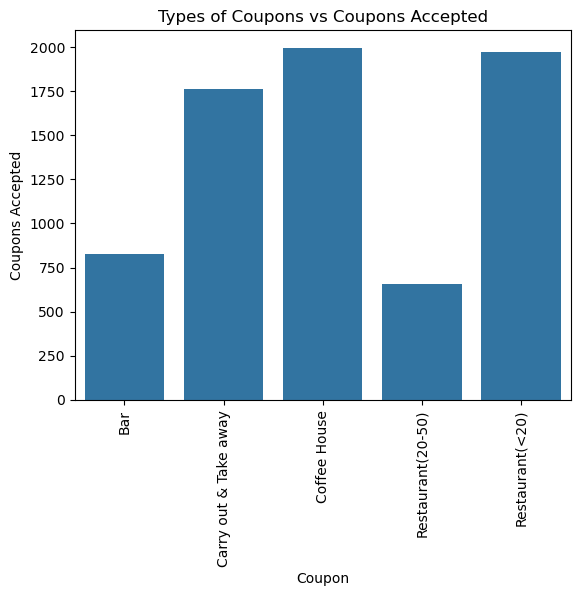

In [552]:
sns.barplot(data_bar, x = 'coupon', y = 'Y')
plt.xlabel('Coupon')
plt.ylabel('Coupons Accepted')
plt.xticks(rotation=90)
plt.title('Types of Coupons vs Coupons Accepted')

plt.savefig("images/Types of Coupons vs Coupons Accepted")

6. Use a histogram to visualize the temperature column.

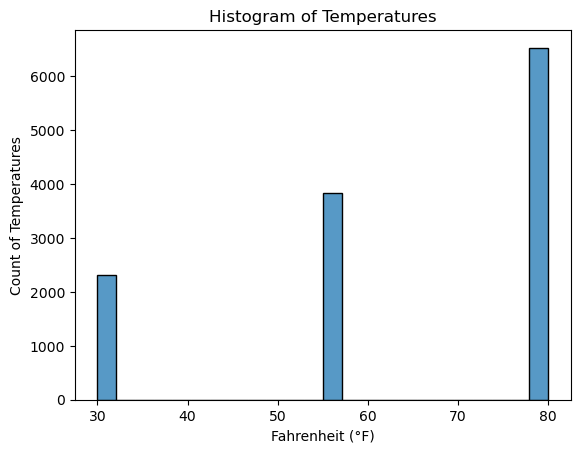

In [550]:
sns.histplot(data1, x = 'temperature')
plt.xlabel('Fahrenheit (°F)')
plt.ylabel('Count of Temperatures')
plt.title('Histogram of Temperatures')

plt.savefig("images/Histogram of Temperatures")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [108]:
dbar = data.query("coupon == 'Bar'")

2. What proportion of bar coupons were accepted?


In [112]:
dbar['Y'].sum()/dbar.shape[0]

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [322]:
# Determine unique strings in Bar column
dbar['Bar'].unique()

array([0, 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [120]:
# Replace NaN and Never with 0
dbar['Bar'] = dbar['Bar'].replace('never', 0).fillna(0)

/var/folders/wl/swxg00192qzgkm_xpk6tkj_00000gn/T/ipykernel_41844/2299997089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbar['Bar'] = dbar['Bar'].replace('never', 0).fillna(0)


In [320]:
# Calculate the total number of acceptance between less than 3 and more than 3 visits to a bar a month and then divide by the total number of Bar coupons.

dbar3 = dbar.query('Bar in [ "less1" ,"1~3" , "0"]')['Y'].sum()
dbarM = dbar.query('Bar == "gt8" or Bar == "4~8"')['Y'].sum()

dbar3rate = round(dbar3/dbar.shape[0]*100,1)
dbarMrate = round(dbarM/dbar.shape[0]*100,1)
print(dbar3)
print(dbarM)
print(dbar.shape[0])
print(f"{dbar3rate}% Acceptance rate for people who went to the bar 3 or fewer times a month\n{dbarMrate}% Acceptance rate for people who went to the bar more than 3 times a month")

510
153
2017
25.3% Acceptance rate for people who went to the bar 3 or fewer times a month
7.6% Acceptance rate for people who went to the bar more than 3 times a month


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [182]:
# Checks for unique values in age column

data['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [200]:
# Check for acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others

dbara = dbar.query('(Bar == "1~3" or Bar == "gt8" or Bar == "4~8") and (age != "21" and age != "below21")')['Y'].sum()
dbararate = round(dbara/dbar.shape[0]*100,1)
print(f"{dbararate}% Acceptance rate for people who went to the bar > 1 time a month and are older than 25")

14.5% Acceptance rate for people who went to the bar > 1 time a month and are older than 25


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [192]:
# Check for unique values in passanger column

data['passanger'].unique()

array(['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], dtype=object)

In [194]:
# Check for  unique values in occupation column

data['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [208]:
# Check for acceptance rate for  the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

dbar4 = dbar.query('(Bar == "1~3" or Bar == "gt8" or Bar == "4~8") and (passanger != "Kid(s)" and passanger != "Alone") and (occupation != "farming" and occupation != "fishing" and occupation != "forestry")')['Y'].sum()
dbar4rate = round(dbar4/dbar.shape[0]*100,1)
print(f"{dbar4rate}% Acceptance rate for people who went to the bar > 1 time a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.")

6.9% Acceptance rate for people who went to the bar > 1 time a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [212]:
# Check for unique values in maritalStatus column

dbar['maritalStatus'].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [240]:
# Calculate acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
dbar61 = dbar.query('(Bar == "1~3" or Bar == "gt8" or Bar == "4~8") and (passanger != "Kid(s)" and passanger != "Alone") and (maritalStatus != "Widowed")')['Y'].sum()
dbar61rate = round(dbar61/dbar.shape[0]*100,1)

In [242]:
# Calculate acceptance rate for drivers who go to bars more than once a month and are under the age of 30
dbar62 = dbar.query('(Bar == "1~3" or Bar == "gt8" or Bar == "4~8") and (age in [ "21" , "below21" , "below26"])')['Y'].sum()
dbar62rate = round(dbar62/dbar.shape[0]*100,1)

In [228]:
# Check for unique values in appropriate column

dbar['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', nan, 'never'], dtype=object)

In [230]:
# Check for unique values in appropriate column

dbar['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [246]:
# Calculate acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K
dbar63 = dbar.query('(RestaurantLessThan20 in ["4-8","gt8"]) and (income in [ "$25000 - $37499" , "$37500 - $49999" , "$12500 - $24999", "Less than $12500"])')['Y'].sum()
dbar63rate = round(dbar63/dbar.shape[0]*100,1)

In [324]:
# Summary of all analysis

print(f"{dbar3rate}% Acceptance rate for people who went to the bar 3 or fewer times a month\n{dbarMrate}% Acceptance rate for people who went to the bar more than 3 times a month")
print(f"{dbararate}% Acceptance rate for people who went to the bar > 1 time a month and are older than 25")
print(f"{dbar4rate}% Acceptance rate for people who went to the bar > 1 time a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.")
print(f"{dbar61rate}% Acceptance rate for people who go to bars more than once a month, had passengers that were not a kid, and were not widowed")
print(f"{dbar62rate}% Acceptance rate for people who go to bars more than once a month and are under the age of 30")
print(f"{dbar63rate}% Acceptance rate for people who go to cheap restaurants more than 4 times a month and income is less than 50K")

25.3% Acceptance rate for people who went to the bar 3 or fewer times a month
7.6% Acceptance rate for people who went to the bar more than 3 times a month
14.5% Acceptance rate for people who went to the bar > 1 time a month and are older than 25
6.9% Acceptance rate for people who went to the bar > 1 time a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
6.9% Acceptance rate for people who go to bars more than once a month, had passengers that were not a kid, and were not widowed
5.9% Acceptance rate for people who go to bars more than once a month and are under the age of 30
2.8% Acceptance rate for people who go to cheap restaurants more than 4 times a month and income is less than 50K


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
# Drivers who go to the bar between 1 - 3 times a month, older than 25, with income > $50 K were more likly to accept the coupon for the bar.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [374]:
# Create dataframe where coupon is for coffee house
dcoffee = data.query("coupon == 'Coffee House'")

In [376]:
# Identify what portion of coffee house coupons were accepted
dcoffee['Y'].sum()/dcoffee.shape[0]

0.49924924924924924

In [378]:
# Check column names and object types
dcoffee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3996 entries, 1 to 12681
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3996 non-null   object
 1   passanger             3996 non-null   object
 2   weather               3996 non-null   object
 3   temperature           3996 non-null   int64 
 4   time                  3996 non-null   object
 5   coupon                3996 non-null   object
 6   expiration            3996 non-null   object
 7   gender                3996 non-null   object
 8   age                   3996 non-null   object
 9   maritalStatus         3996 non-null   object
 10  has_children          3996 non-null   int64 
 11  education             3996 non-null   object
 12  occupation            3996 non-null   object
 13  income                3996 non-null   object
 14  car                   37 non-null     object
 15  Bar                   3959 non-null   obje

### Plot charts of various categories

Ploting different charts to understand the acceptance rates of different categories

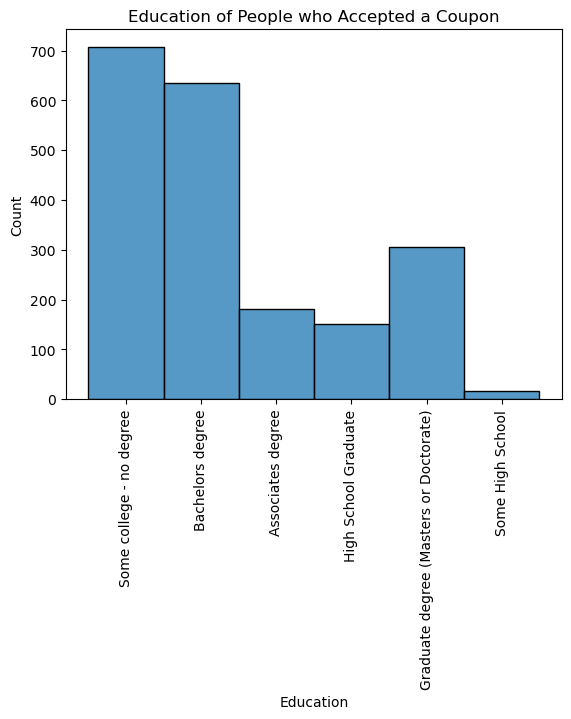

In [548]:
dcoffee_acp = dcoffee[dcoffee['Y'] == 1]

sns.histplot(dcoffee_acp, x = 'education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Education of People who Accepted a Coupon')

plt.savefig("images/Education of People who Accepted a Coupon")

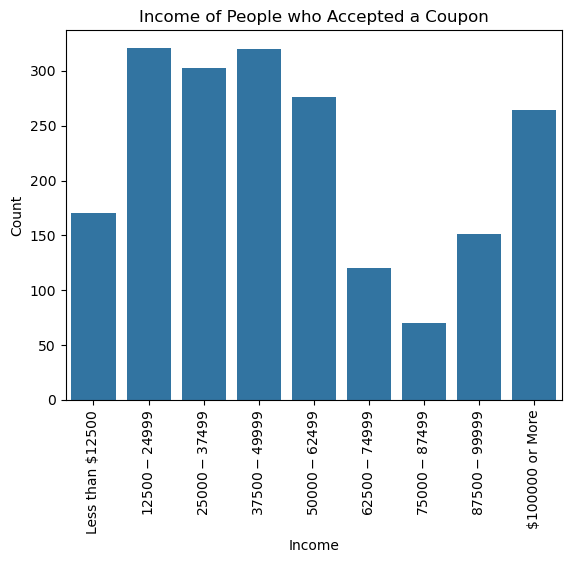

In [546]:
sns.countplot(dcoffee_acp, x = 'income', order=['Less than $12500','$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More'])
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Income of People who Accepted a Coupon')

plt.savefig("images/Income of People who Accepted a Coupon")

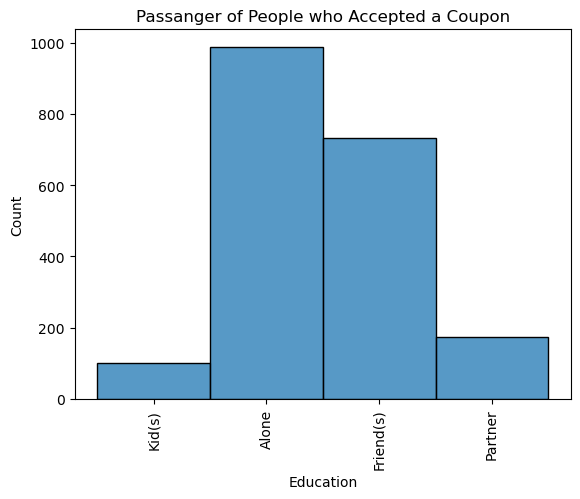

In [544]:
sns.histplot(dcoffee_acp, x = 'passanger')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Passanger of People who Accepted a Coupon')

plt.savefig("images/Passanger of People who Accepted a Coupon")

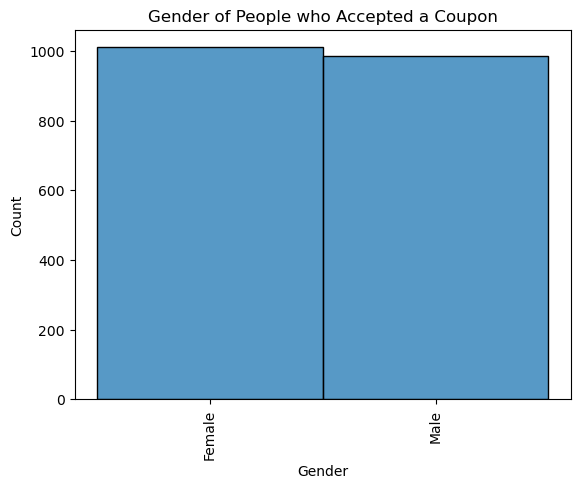

In [542]:
sns.histplot(dcoffee_acp, x = 'gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Gender of People who Accepted a Coupon')

plt.savefig("images/Gender of People who Accepted a Coupon")

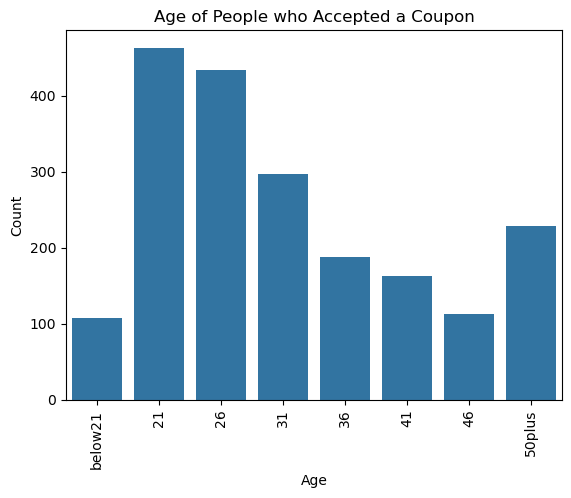

In [540]:
sns.countplot(dcoffee_acp, x = 'age', order=['below21','21','26','31','36','41','46','50plus'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Age of People who Accepted a Coupon')

plt.savefig("images/Age of People who Accepted a Coupon")

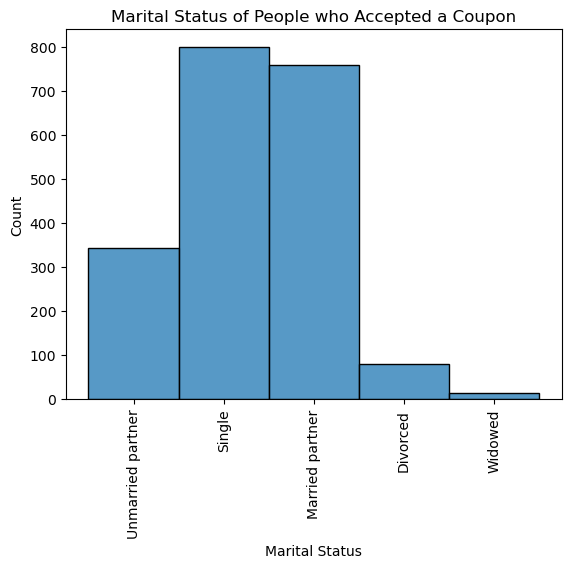

In [538]:
sns.histplot(dcoffee_acp, x = 'maritalStatus')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Marital Status of People who Accepted a Coupon')

plt.savefig("images/Marital Status of People who Accepted a Coupon")

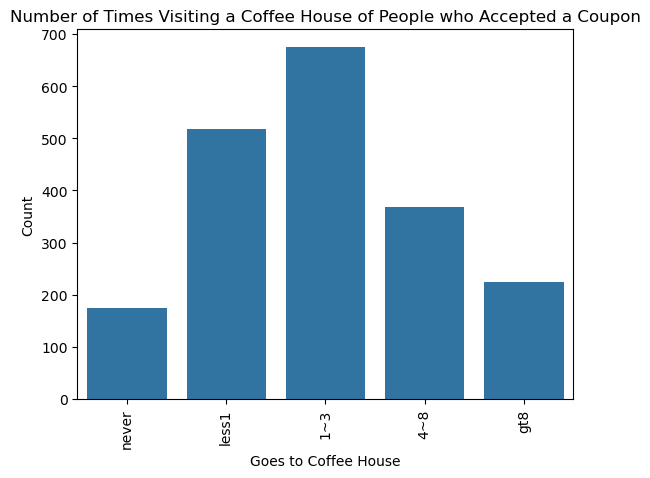

In [536]:
sns.countplot(dcoffee_acp, x = 'CoffeeHouse', order = ['never', 'less1', '1~3', '4~8', 'gt8'])
plt.xlabel('Goes to Coffee House')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Number of Times Visiting a Coffee House of People who Accepted a Coupon')

plt.savefig("images/Number of Times Visiting a Coffee House of People who Accepted a Coupon")

### Calculate acceptance rate for different scenarios

In [446]:
dcoffee1 = dcoffee.query(
    '(CoffeeHouse in ["1~3", "less1"]) and '
    '(maritalStatus in ["Single", "Married partner"]) and '
    '(age in ["21", "26", "31"]) and '
    '(income in ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999", "$50000 - $62499"])'
)['Y'].sum()
dcoffee1rate = round(dcoffee1/dcoffee.shape[0]*100,1)

In [460]:
dcoffeet = dcoffee.query(
    'CoffeeHouse in ["1~3", "less1"]'
)['Y'].sum()
dcoffeetrate = round(dcoffeet/dcoffee.shape[0]*100,1)

In [462]:
dcoffeems = dcoffee.query(
    '(maritalStatus in ["Single", "Married partner"])'
)['Y'].sum()
dcoffeemsrate = round(dcoffeems/dcoffee.shape[0]*100,1)

In [464]:
dcoffeea = dcoffee.query(
    '(age in ["21", "26", "31"])'
)['Y'].sum()
dcoffeearate = round(dcoffeea/dcoffee.shape[0]*100,1)

In [466]:
dcoffeei = dcoffee.query(
    '(income in ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999", "$50000 - $62499"])'
)['Y'].sum()
dcoffeeirate = round(dcoffeei/dcoffee.shape[0]*100,1)

In [482]:
print(dcoffee1rate, dcoffeetrate, dcoffeemsrate, dcoffeearate, dcoffeeirate)

10.6 29.9 39.0 29.9 34.8


In [502]:
print(f"{dcoffee1rate}% Acceptance rate for people related to visits to coffee house, maritial status, age and income")
print(f"{dcoffeetrate}% Acceptance rate for people who go to the coffee house less than 3 times")
print(f"{dcoffeemsrate}% Acceptance rate for people who are single or have a married partner")
print(f"{dcoffeearate}% Acceptance rate for people who are less than 31 in age")
print(f"{dcoffeeirate}% Acceptance rate for people who make less than $62,500")

10.6% Acceptance rate for people related to visits to coffee house, maritial status, age and income
29.9% Acceptance rate for people who go to the coffee house less than 3 times
39.0% Acceptance rate for people who are single or have a married partner
29.9% Acceptance rate for people who are less than 31 in age
34.8% Acceptance rate for people who make less than $62,500
